## Active Brownian particles

We study the overdamped Brownian dynamics of a self-propelled ("active") particle driven by an internal force $F_0 \hat{n}(t)$, where $\hat{n}(t)$ is a unit vector.

The equations of motion for a 2d active Brownian particle in a bath at temperature $T$ are
$$
\xi \frac{d\vec{r}}{dt} = F_0 \hat{n}(t) + \vec{\theta}(t)
$$
$$
\xi_R \frac{d\phi}{dt} = \theta_R(t)
$$
where $\hat{n} = (cos(\phi), sin(\phi))$ and $\vec{\theta}$ and $\theta_R$ are stochastic forces related to the friction coefficients $\xi$ and $\xi_R$ by the usual fluctuation-dissipation relations.

Analytical results for this model can be found in http://arxiv.org/abs/0906.3418, see also https://arxiv.org/abs/1005.1343.

In [2]:
import numpy
import matplotlib.pyplot as plt 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


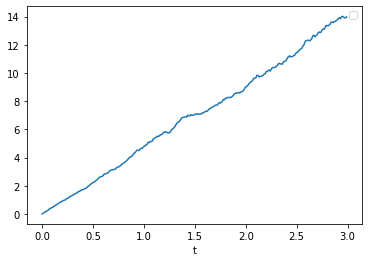

In [4]:
# Model parameters
npart = 1000
ndims = 2
xi = 1.0
xi_R = 1.0 
k = 0.5
T = 1.0
dt = 0.01
nsteps = int(3.0 / dt)

# DETERMINE THE AMPLITUDE OF THE STOCHASTIC FORCES HERE!
D = T / xi
width = (2 * D * dt)**0.5

D_R = T / xi_R
width_R = (2 * D_R * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
phi = 0.5*numpy.pi
msd = []
for i in range(nsteps):    
    # Store MSD
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for position in positions:
        # CODE THE STOCHASTIC FORCES HERE!
        # --------------------------------
        noise = numpy.random.normal(0.0, width, ndims)
        noise_R = numpy.random.normal(0.0, width_R, 1)
        
        
        # CODE THE ACTIVE INTERNAL FORCE HERE!
        # ------------------------------------
        phi += noise_R
        force = numpy.zeros(ndims)
        force = numpy.array([10 for _ in range(ndims)])
        force[0] = force[0] * numpy.cos(phi)
        force[1] = force[1] * numpy.sin(phi)
        
        position += noise + force * dt / xi

time = numpy.array(range(nsteps)) * dt
plt.plot(time, msd)
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')
plt.legend()

**Exercise**: *active Brownian particle in a 1d channel*

1. Project the equations of motion along the $x$-axis and determine analytically $\langle \cos{\phi(t)}\rangle$ and $\langle x(t)\rangle$.

2. Simulate an active Brownian particle confined in a 1d channel and compute the displacement $\langle x(t) - x(0)\rangle$. Compare the simulation results against the analytical ones for selected values of $D=k_BT/\xi$ and $D_R=k_B T/ \xi_R$. Choose $\phi(0)=0$. Which factor controls the approach to equilibrium?

3. Compute numerically the mean square displacement $\langle |x(t) - x(0)|^2 \rangle$ and compare it to the analytical results given in the above references.

1. $\langle \cos\phi(t) \rangle = \exp\bigl(-D_{R}t\bigr) \cos \phi_{0}$

$\langle x(t) \rangle = \frac{4 F_{0}}{3 k_{B} T} \cos\phi_{0} \bigl(1-e^{-D_{R}t} \bigr)$

2. La simulazione numerica dà risultati qualitativamente corretti per $\langle x(t) \rangle$ ma il valore di saturazione non corrisponde al $\frac{4F_{0}\cos\phi_{0}}{3k_{B}T}$ previsto dal risultato analitico. Prendendo invece $\frac{F_{0}\cos\phi_{0}}{k_{B}T}$ si ottiene un buon accordo tra simulazione e teoria. Perchè? booh

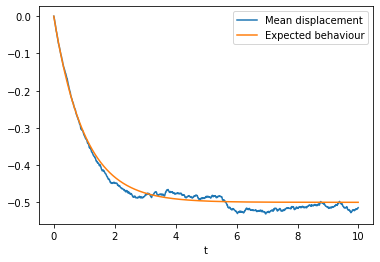

In [7]:
# Model parameters
npart = 10000
ndims = 1
xi = 1
xi_R = 1
k = 0.5
T = 1.0
dt = 0.01
nsteps = int(10.0 / dt)
F_0 = 0.5
phi_0 = numpy.pi

# DETERMINE THE AMPLITUDE OF THE STOCHASTIC FORCES HERE!
D = T / xi
width = (2 * D * dt)**0.5

D_R = T / xi_R
width_R = (2 * D_R * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
phi = numpy.ones((npart, ndims))*phi_0
md = []
msd = []
for i in range(nsteps):    
    # Store MD
    md.append(numpy.sum(positions) / npart)
    
    # Store MSD
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for i in range(len(positions)):
        # CODE THE STOCHASTIC FORCES HERE!
        # --------------------------------
        noise = numpy.random.normal(0.0, width, ndims)
        noise_R = numpy.random.normal(0.0, width_R, ndims)
        
        
        # CODE THE ACTIVE INTERNAL FORCE HERE!
        # ------------------------------------
        #print(numpy.cos(phi[i]))
        phi[i] += noise_R
        force = numpy.zeros(ndims)
        force = numpy.array([F_0 for _ in range(ndims)])
        force = force * numpy.cos(phi[i])
        
        positions[i] += noise + force * dt / xi

time = numpy.array(range(nsteps)) * dt
plt.plot(time, md, label='Mean displacement')
plt.plot(time, F_0/T*numpy.cos(phi_0)*(1-numpy.exp(-D_R*time)), '-', label='Expected behaviour')
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')
plt.legend()

3. Risultati numerici per $\langle x^{2}(t) \rangle$ e confronto con risultati analitici per il caso senza forza interna:

$\langle x^{2}(t) \rangle = 2Dt$

e con forza interna:

$\langle x^{2}(t) \rangle = 2Dt + \bigl(\frac{F_0}{k_{B}T}\bigr)^{2} \biggl( \exp(-D_{R} t) + D_{R}t - 1 + \frac{\cos(2\phi_{0})}{12} \bigl(\exp(-4D_{R}t)- 4\exp(-D_{R}t)+3)\bigr) \biggr)$

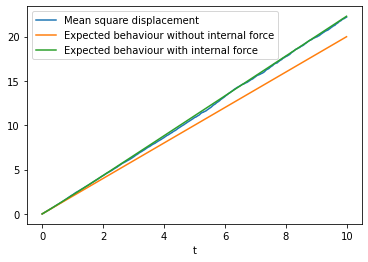

In [8]:
plt.plot(time, msd, label='Mean square displacement')
plt.plot(time, 2*D*time, '-', label='Expected behaviour without internal force')
plt.plot(time, 2*D*time + (F_0/T)**2 * (numpy.exp(-D_R*time) + D_R*time -1 + numpy.cos(2*phi_0)/12*(numpy.exp(-4*D_R*time)-4*numpy.exp(-D_R*time)+3)), '-', label='Expected behaviour with internal force')
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')
plt.legend()